In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


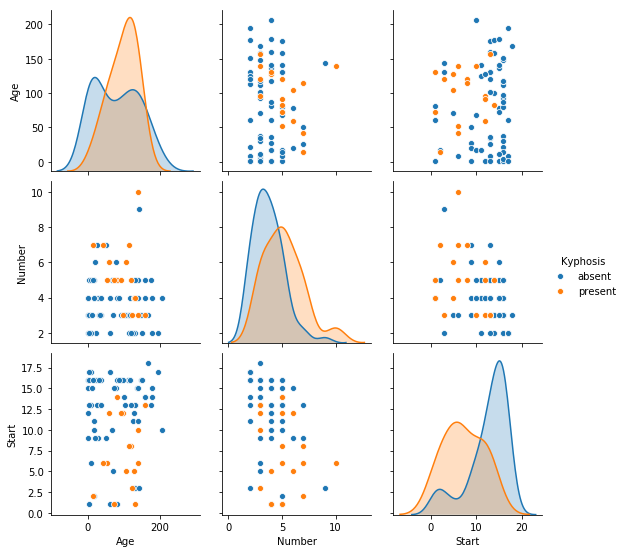

In [5]:
sns.pairplot(df, hue='Kyphosis')

In [6]:
## Machine learning modeling
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['Kyphosis'], axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
pred = dtc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        15
     present       1.00      0.33      0.50         6

    accuracy                           0.81        21
   macro avg       0.89      0.67      0.69        21
weighted avg       0.85      0.81      0.77        21



In [20]:
dtc_chisquare = DecisionTreeClassifier(criterion='entropy')


In [21]:
dtc_chisquare.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
pred_entropy = dtc.predict(X_test)
print(confusion_matrix(y_test,pred_entropy))
print(classification_report(y_test,pred_entropy))

[[15  0]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        15
     present       1.00      0.33      0.50         6

    accuracy                           0.81        21
   macro avg       0.89      0.67      0.69        21
weighted avg       0.85      0.81      0.77        21

